# Section A

In [ ]:
import numpy as np
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk import tokenize
from nltk.tokenize import word_tokenize
from operator import itemgetter
import math
import string
import ast
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.preprocessing import StandardScaler
!pip install kneed
from kneed import KneeLocator

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv('drive/MyDrive/OSGD/Associate Project/data.csv')
df

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.991000,['Mamie Smith'],0.598,168333,0.224,0,0cS0A1fUEUd1EW3FcF8AEI,0.000522,5,0.3790,-12.628,0,Keep A Song In Your Soul,12,1920,0.0936,149.976,0.6340,1920
1,0.643000,"[""Screamin' Jay Hawkins""]",0.852,150200,0.517,0,0hbkKFIJm7Z05H8Zl9w30f,0.026400,5,0.0809,-7.261,0,I Put A Spell On You,7,1920-01-05,0.0534,86.889,0.9500,1920
2,0.993000,['Mamie Smith'],0.647,163827,0.186,0,11m7laMUgmOKqI3oYzuhne,0.000018,0,0.5190,-12.098,1,Golfing Papa,4,1920,0.1740,97.600,0.6890,1920
3,0.000173,['Oscar Velazquez'],0.730,422087,0.798,0,19Lc5SfJJ5O1oaxY0fpwfh,0.801000,2,0.1280,-7.311,1,True House Music - Xavier Santos & Carlos Gomi...,17,1920-01-01,0.0425,127.997,0.0422,1920
4,0.295000,['Mixe'],0.704,165224,0.707,1,2hJjbsLCytGsnAHfdsLejp,0.000246,10,0.4020,-6.036,0,Xuniverxe,2,1920-10-01,0.0768,122.076,0.2990,1920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174384,0.009170,"['DJ Combo', 'Sander-7', 'Tony T']",0.792,147615,0.866,0,46LhBf6TvYjZU2SMvGZAbn,0.000060,6,0.1780,-5.089,0,The One,0,2020-12-25,0.0356,125.972,0.1860,2020
174385,0.795000,['Alessia Cara'],0.429,144720,0.211,0,7tue2Wemjd0FZzRtDrQFZd,0.000000,4,0.1960,-11.665,1,A Little More,0,2021-01-22,0.0360,94.710,0.2280,2021
174386,0.806000,['Roger Fly'],0.671,218147,0.589,0,48Qj61hOdYmUCFJbpQ29Ob,0.920000,4,0.1130,-12.393,0,Together,0,2020-12-09,0.0282,108.058,0.7140,2020
174387,0.920000,['Taylor Swift'],0.462,244000,0.240,1,1gcyHQpBQ1lfXGdhZmWrHP,0.000000,0,0.1130,-12.077,1,champagne problems,69,2021-01-07,0.0377,171.319,0.3200,2021


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174389 entries, 0 to 174388
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   acousticness      174389 non-null  float64
 1   artists           174389 non-null  object 
 2   danceability      174389 non-null  float64
 3   duration_ms       174389 non-null  int64  
 4   energy            174389 non-null  float64
 5   explicit          174389 non-null  int64  
 6   id                174389 non-null  object 
 7   instrumentalness  174389 non-null  float64
 8   key               174389 non-null  int64  
 9   liveness          174389 non-null  float64
 10  loudness          174389 non-null  float64
 11  mode              174389 non-null  int64  
 12  name              174389 non-null  object 
 13  popularity        174389 non-null  int64  
 14  release_date      174389 non-null  object 
 15  speechiness       174389 non-null  float64
 16  tempo             17

### 1) How many unique artists are in the dataset?

In [ ]:
artist_list=[]
for i in range(df.shape[0]):
    artist_list += ast.literal_eval(df['artists'][i]) # artists data are strings that look like lists, so we turn them into lists of artists
artist_set=set(artist_list)
print(f"There are {len(artist_set)} unique artists in the dataset")

There are 32540 unique artists in the dataset


### 2) What are the most common words in a song title? (ignore words like the, a etc.)

In [ ]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
print(stop_words) # set of English stop words

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
{'are', 'down', "you'll", 'where', "she's", 'himself', 'of', 'because', 'wouldn', "hasn't", 'under', 'mightn', 'my', 'having', "doesn't", 'than', 'o', 'myself', 'most', "you've", 'had', 'some', 'both', 'herself', 'hadn', 'yourself', 'these', 'themselves', 'again', 'after', 'then', 'aren', 'between', 'been', 'didn', 'won', 're', "you're", 'there', 'haven', "mustn't", "you'd", 'before', 'me', 'y', 'for', 'no', "aren't", "wasn't", 'its', 'the', 'do', 'or', 'be', "don't", 'more', 'mustn', 'shan', 'should', 'an', 'during', 'did', 'have', 'his', 'they', "shan't", 'by', 'now', 'above', "should've", 'if', 'same', 'and', 't', 'further', 'here', 'each', "that'll", 'which', 'were', 'couldn', 'shouldn', 'at', 'her', 've', 'those', 'ain', 'doing', 'will', 'what', "hadn't", 'm', 'through', 'below', 'too', 'about', 'isn', 'ours', 'until', 'very', 'any', 'does', 'is', 'being', 'only', 'that',

In [ ]:
string.punctuation # list of punctuations

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
names_concat = ' '.join(df['name']) # join song names into single string
names_concat=names_concat.lower() # convert letters to lowercase

for i in string.punctuation: # replace punctuations by ' '
    names_concat=names_concat.replace(i,' ')

words = names_concat.split()
num_of_words = len(words)

Text(0, 0.5, 'occurence rate')

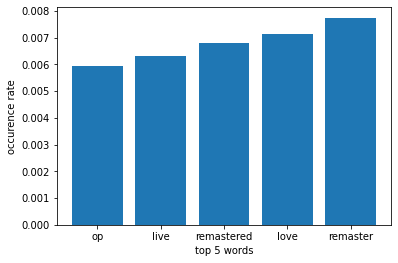

In [ ]:
tf_score = {}

for each_word in words: # compute number of occurences for each word
    if each_word not in stop_words:
        if each_word in tf_score:
            tf_score[each_word] += 1
        else:
            tf_score[each_word] = 1

tf_score.update((x, y/int(num_of_words)) for x, y in tf_score.items()) # divide number of occurences by total number of words
tf_sorted=dict(sorted(tf_score.items(), key=lambda item: item[1])) # sort dictionary in increasing order of occurence rate

plt.bar(list(tf_sorted.keys())[-5:], list(tf_sorted.values())[-5:])
plt.xlabel('top 5 words')
plt.ylabel('occurence rate')

### 3) What are the average characteristics of the songs by Frank Ocean? (including songs he features on)

In [ ]:
df_Frank=df.iloc[[i for i in range(df.shape[0]) if 'Frank Ocean' in df['artists'][i]]] # dataset of songs by Frank Ocean
df_Frank.mean()

acousticness             0.512161
danceability             0.565684
duration_ms         220240.929825
energy                   0.491142
explicit                 0.631579
instrumentalness         0.061028
key                      4.543860
liveness                 0.223756
loudness                -9.384877
mode                     0.526316
popularity              62.614035
speechiness              0.151954
tempo                  113.518947
valence                  0.408326
year                  2014.403509
dtype: float64

### 4) Which artists saw the biggest absolute jumps in popularity between consecutive song releases?

In [ ]:
df_sorted=df.sort_values('release_date')
df_sorted.head(200)

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.99100,['Mamie Smith'],0.598,168333,0.224,0,0cS0A1fUEUd1EW3FcF8AEI,0.000522,5,0.379,-12.628,0,Keep A Song In Your Soul,12,1920,0.0936,149.976,0.6340,1920
145,0.99600,['Mamie Smith & Her Jazz Hounds'],0.632,169067,0.266,0,4Lb0u3JwC4EWQXugQKGphZ,0.036500,7,0.444,-12.849,1,That Da Da Strain,0,1920,0.0438,127.441,0.5750,1920
148,0.99600,['Mamie Smith & Her Jazz Hounds'],0.593,177427,0.291,0,4RDT3ftT3V0IJVmW0TNgof,0.084500,3,0.210,-11.421,1,Don't Care Blues,0,1920,0.0463,146.880,0.8560,1920
149,0.98900,['Dick Haymes'],0.402,163080,0.158,0,4ZtNSgwk3ErgdrhpNXokHx,0.130000,3,0.311,-16.900,0,Lady of the Evening,0,1920,0.0390,103.220,0.1960,1920
150,0.98500,['Dick Haymes'],0.328,195347,0.201,0,4d7IwbmhNmY2gQBtaYnTZ7,0.517000,10,0.113,-16.491,1,Hush Little Darlin',0,1920,0.0408,79.883,0.3100,1920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,0.97900,['Aggeliki Karagianni'],0.525,258167,0.433,0,4kQxqLAtWzMrThDHBwV8q1,0.111000,2,0.134,-11.426,1,To katinaki,0,1920-01-01,0.0488,102.578,0.7920,1920
155,0.01480,['696'],0.594,158407,0.844,1,4jFsBM3wEzUXd9k8H4CL2A,0.000000,10,0.202,-6.645,0,Curved Fist,2,1920-01-01,0.0740,115.069,0.2120,1920
49,0.98300,['Aryiró Yiannopoúlou'],0.553,203640,0.375,0,13Cp2OYw0AXbb39kj4vony,0.223000,0,0.408,-9.089,0,"Neráida, tsámiko",0,1920-01-01,0.0336,110.115,0.5920,1920
154,0.00294,['696'],0.609,89757,0.838,1,4fGLehaLo7wfTZiCpb7C4q,0.000173,10,0.358,-6.634,0,Classic Booty,0,1920-01-01,0.1430,150.054,0.1530,1920


Notice that there are many songs with the same release date and there are songs which only have the year as the release date, so the problem is ill-defined. For example data 0, 145 and 148 all have Mamie Smith as one of the artists and have release date 1920. Here we assume that the dataset above is in order of release date, in particular 1920 is assumed to be earlier than 1920-01-01 etc.

Text(0, 0.5, 'maximum absolute jump')

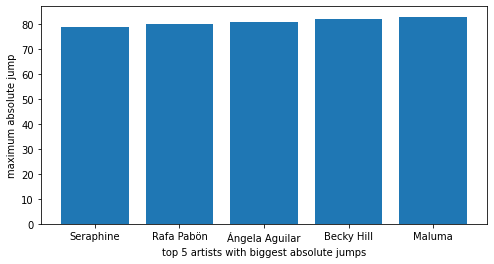

In [ ]:
max_absjump = {} # maximum absolute jump for each artist
prev_pop = {} # stores popularity of the previous song for each artist

for i in range(df_sorted.shape[0]):
    for artist in ast.literal_eval(df_sorted['artists'].iloc[i]):        
        if artist in prev_pop:
            max_absjump[artist] = abs(df_sorted['popularity'].iloc[i]-prev_pop[artist])
            prev_pop[artist] = df_sorted['popularity'].iloc[i]
        else:
            prev_pop[artist] = df_sorted['popularity'].iloc[i]

max_absjump_sorted=dict(sorted(max_absjump.items(), key=lambda item: item[1])) # sort dictionary in increasing order of maximum absolute jumps

plt.figure(figsize=(8,4))
plt.bar(list(max_absjump_sorted.keys())[-5:], list(max_absjump_sorted.values())[-5:])
plt.xlabel('top 5 artists with biggest absolute jumps')
plt.ylabel('maximum absolute jump')

### 5) Genre labels have been removed from the dataset. Using kmeans clustering what do you think would be a good number of ‘genres’ for us to group the dataset by? Cluster the data and add the labels to the dataframe.

In [ ]:
# We perform PCA on the data. As PCA is designed for continuous variables, we only use the features below:
cont_features = ['acousticness','danceability','energy','instrumentalness','liveness','loudness','speechiness','tempo','valence']
scaler = StandardScaler()
scaled_data=scaler.fit_transform(df[cont_features]) # standardisation of relevant features
clusterdata = pd.DataFrame(data=scaled_data, columns=cont_features)
print(clusterdata.head())

   acousticness  danceability    energy  ...  speechiness     tempo   valence
0      1.294358      0.347919 -0.948791  ...    -0.066549  1.089753  0.413903
1      0.378411      1.790898  0.125710  ...    -0.287113 -0.995485  1.608718
2      1.299622      0.626289 -1.088146  ...     0.374580 -0.641450  0.621861
3     -1.313529      1.097814  1.156204  ...    -0.346918  0.363273 -1.823729
4     -0.537536      0.950107  0.822485  ...    -0.158725  0.167564 -0.852753

[5 rows x 9 columns]


In [ ]:
# apply PCA on the dataset
pca = PCA(n_components = 2, whiten=True)
pca.fit(clusterdata)
Z = pca.transform(clusterdata) # projections of the data on the first 2 principal components

<Figure size 432x288 with 0 Axes>

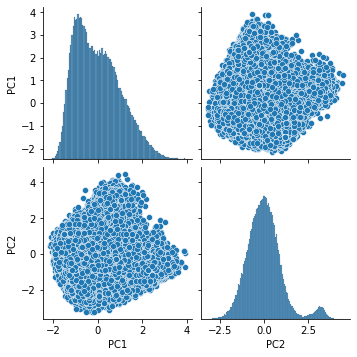

In [ ]:
plt.figure()
sns.pairplot(data=pd.DataFrame(Z, columns=['PC1','PC2'])) # pairplot of projections on the first 2 principal components

In [ ]:
# elbow method to evaluate the appropriate number of clusters
kmeans_kwargs = {"init": "random","n_init": 100,"max_iter": 300,"random_state": 0}
sse = [] # list holds the SSE values for each k
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(Z)
    sse.append(kmeans.inertia_)

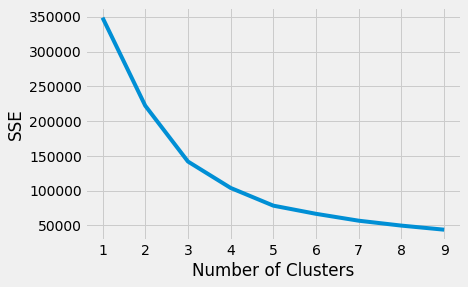

In [ ]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 10), sse)
plt.xticks(range(1, 10))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [ ]:
# identify the elbow point
kl = KneeLocator(range(1, 10), sse, curve="convex", direction="decreasing")
kl.elbow

3

In [ ]:
# Apply kmeans on the first 2 components of Z
kmeans = KMeans(init='random', n_clusters=3, n_init=100, max_iter=300,random_state=0)
kmeans.fit(Z)
labels = kmeans.labels_
Z2 = pd.concat([pd.DataFrame(Z,columns=['PC1','PC2']),pd.DataFrame(labels, columns=['Cluster label'])], axis=1)

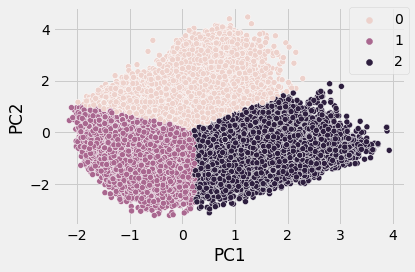

In [ ]:
# pairplot with different colours for different clusters
plt.figure()
sns.scatterplot(data = Z2, x='PC1', y='PC2', hue = 'Cluster label')
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
plt.tight_layout()

In [ ]:
# add cluster labels to dataframe
df2 = pd.concat([df,pd.DataFrame(labels, columns=['Cluster label'])], axis=1)
df2['Cluster label'] = df2['Cluster label'].astype('category')
df2.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year,Cluster label
0,0.991000,['Mamie Smith'],0.598,168333,0.224,0,0cS0A1fUEUd1EW3FcF8AEI,0.000522,5,0.3790,-12.628,0,Keep A Song In Your Soul,12,1920,0.0936,149.976,0.6340,1920,0
1,0.643000,"[""Screamin' Jay Hawkins""]",0.852,150200,0.517,0,0hbkKFIJm7Z05H8Zl9w30f,0.026400,5,0.0809,-7.261,0,I Put A Spell On You,7,1920-01-05,0.0534,86.889,0.9500,1920,0
2,0.993000,['Mamie Smith'],0.647,163827,0.186,0,11m7laMUgmOKqI3oYzuhne,0.000018,0,0.5190,-12.098,1,Golfing Papa,4,1920,0.1740,97.600,0.6890,1920,0
3,0.000173,['Oscar Velazquez'],0.730,422087,0.798,0,19Lc5SfJJ5O1oaxY0fpwfh,0.801000,2,0.1280,-7.311,1,True House Music - Xavier Santos & Carlos Gomi...,17,1920-01-01,0.0425,127.997,0.0422,1920,1
4,0.295000,['Mixe'],0.704,165224,0.707,1,2hJjbsLCytGsnAHfdsLejp,0.000246,10,0.4020,-6.036,0,Xuniverxe,2,1920-10-01,0.0768,122.076,0.2990,1920,1


In [ ]:
df2.groupby('Cluster label')[cont_features].mean()

,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
Cluster label,,,,,,,,,
0,0.604064,0.691336,0.380165,0.074785,0.193455,-13.208890,0.243202,109.825935,0.696979
1,0.216676,0.547359,0.706389,0.136835,0.230730,-7.869146,0.067298,128.168171,0.570841
2,0.851228,0.388667,0.220730,0.395804,0.195542,-16.571497,0.048760,105.687697,0.305482


We can see that in general cluster 0 consists of songs that have high speechiness and danceability, and low instrumentalness (e.g. raps), cluster 1 consists of songs that have low acousticness, and high energy, liveness and loudness (e.g. heavy metal), while cluster 2 consists of songs that have high acousticness and instrumentalness, and low valence (e.g. blues). 